## Task: Predict Carbon Emissions Based on Satellite Observations

* You are provided with a time series satellite observations dataset extracted from Sentinel-5P satelite from 2019 to 2021.

* Your objective is to build a regression model that accurately predicts the amount of carbon emissions in the next years.

* Your target is the column: "emission".

* You are provided with the code to download and load the csv file.

* Your work will be evaluated based on the completion of the given tasks below.

* You are allowed to use any models or libraries you want.
    
---


In [67]:
import pandas as pd
import gdown
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [2]:
path = kagglehub.dataset_download("mohammad2012191/q3-data")

print("Path to dataset files:", path)

100%|██████████| 37.6M/37.6M [00:00<00:00, 158MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohammad2012191/q3-data/versions/1


In [40]:
csv_path = os.path.join(path, "train.csv")

data = pd.read_csv(csv_path)
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [41]:
data.tail()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
79018,ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,ID_-3.299_30.301_2021_51,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792
79022,ID_-3.299_30.301_2021_52,-3.299,30.301,2021,52,-0.000091,0.871951,-0.000079,0.000000,76.825638,...,7553.295016,47771.681887,6553.295018,19.464032,0.226276,-12.808528,47.923441,-136.299984,30.246387,27.239302


In [42]:
data.sample()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
73558,ID_-2.922_29.178_2020_47,-2.922,29.178,2020,47,0.000111,0.870668,0.000088,0.102538,-56.090759,...,6789.110026,55277.016556,5884.378867,38.870078,0.275575,24.71991,38.984812,-130.854513,29.583346,56.59204


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

# EDA & Preprocessing

1. Drop the ID feature (ID_LAT_LON_YEAR_WEEK):

In [44]:
# 1. TODO
data.drop('ID_LAT_LON_YEAR_WEEK',axis=1,inplace=True)

2. Check for the missing values and handle them.


In [45]:
# 2. TODO
data.isnull().sum()

,0
latitude,0
longitude,0
year,0
week_no,0
SulphurDioxide_SO2_column_number_density,14609
...,...
Cloud_sensor_azimuth_angle,484
Cloud_sensor_zenith_angle,484
Cloud_solar_azimuth_angle,484
Cloud_solar_zenith_angle,484


In [46]:
data.drop('SulphurDioxide_SO2_column_number_density',axis=1,inplace=True)

In [47]:
missing_percentage = data.isnull().mean() * 100

columns_to_drop = missing_percentage[missing_percentage > 50].index
data.drop(columns=columns_to_drop, inplace=True)

print(data.isnull().sum())

latitude                                            0
longitude                                           0
year                                                0
week_no                                             0
SulphurDioxide_SO2_column_number_density_amf    14609
                                                ...  
Cloud_sensor_azimuth_angle                        484
Cloud_sensor_zenith_angle                         484
Cloud_solar_azimuth_angle                         484
Cloud_solar_zenith_angle                          484
emission                                            0
Length: 67, dtype: int64


In [48]:
data.fillna(data.mean(), inplace=True)

In [49]:
data.isnull().sum()

,0
latitude,0
longitude,0
year,0
week_no,0
SulphurDioxide_SO2_column_number_density_amf,0
...,...
Cloud_sensor_azimuth_angle,0
Cloud_sensor_zenith_angle,0
Cloud_solar_azimuth_angle,0
Cloud_solar_zenith_angle,0


In [50]:
data.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slan

3. Plot the "emission" histogram.

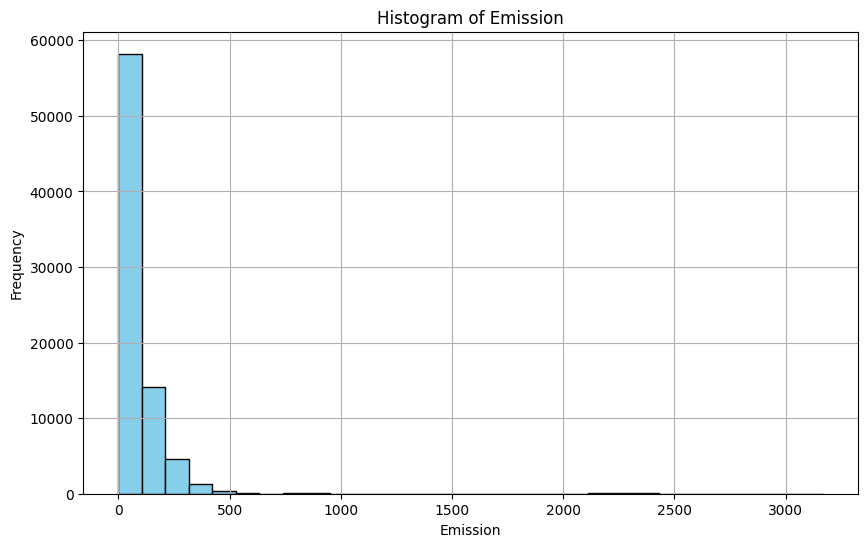

In [51]:
# 3. TODO
plt.figure(figsize=(10, 6))
plt.hist(data['emission'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Emission')
plt.xlabel('Emission')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

4. Plot the "latitude" and "longitude" using a scatter plot then colorize the points using the "emission" column.

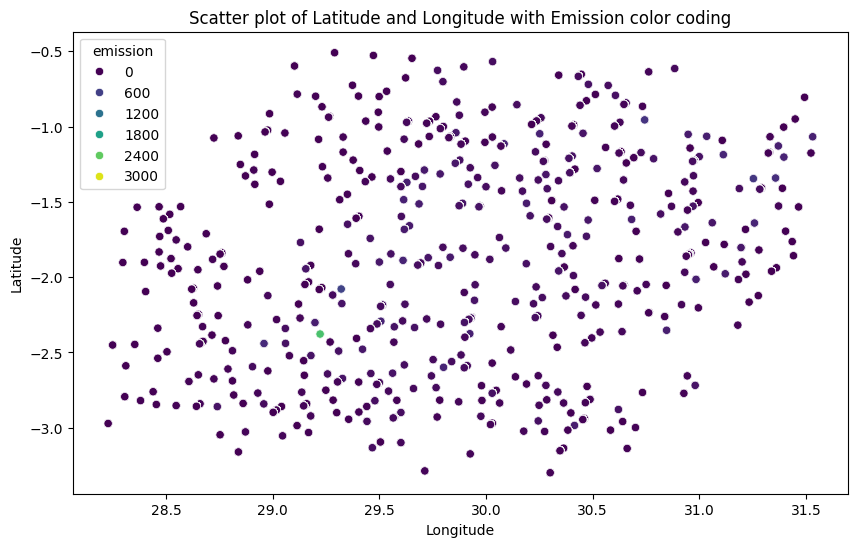

In [52]:
# 4. TODO
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='emission', data=data, palette='viridis')
plt.title("Scatter plot of Latitude and Longitude with Emission color coding")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Feature engineering

1. Add a new feature representing "Location" (To do that, you should convert "longitude" and "latitude" features to string type, concatenate them and add the result as a new feature).

In [53]:
# 1. TODO
data['Location'] = data['latitude'].astype(str) + ',' + data['longitude'].astype(str)
print(data[['latitude', 'longitude', 'Location']].head())

   latitude  longitude     Location
0     -0.51      29.29  -0.51,29.29
1     -0.51      29.29  -0.51,29.29
2     -0.51      29.29  -0.51,29.29
3     -0.51      29.29  -0.51,29.29
4     -0.51      29.29  -0.51,29.29


2. Add one aggregation feature representing the average emissions per location (You should groupby "Location" feature and take mean of the "emission", then merge the result to the data)

In [58]:
average_emission_per_location = data.groupby('Location')['emission'].mean().reset_index()
average_emission_per_location.rename(columns={'emission': 'avg_emission_per_location'}, inplace=True)
data = data.merge(average_emission_per_location, on='Location', how='left')
print(data.columns)
print(data[['Location', 'emission', 'avg_emission_per_location']].head())

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slan

3. Use Label encoder to encode all the categorical features

In [60]:
# 3. TODO
data["emission"].unique()

array([ 3.7509942,  4.0251765,  4.231381 , ..., 29.131205 , 28.125792 ,
       27.239302 ])

In [68]:
label_encoder = LabelEncoder()

In [69]:
# تحويل العمود 'Location' إلى قيم عددية
X_train['Location'] = label_encoder.fit_transform(X_train['Location'])
X_valid['Location'] = label_encoder.transform(X_valid['Location'])

# تحقق من البيانات
print(X_train[['Location']].head())

   Location
0         0
1         0
2         0
3         0
4         0


In [74]:
# تحويل العمود 'Location' إلى قيم عددية في X_train
X_train['Location'] = label_encoder.fit_transform(X_train['Location'])

# تحويل العمود 'Location' إلى قيم عددية في X_valid (باستخدام نفس التحويل)
X_valid['Location'] = label_encoder.transform(X_valid['Location'])

# تحقق من التغيير
print("First 5 rows of X_train['Location']:")
print(X_train['Location'].head())  # تأكد من أن العمود تحول إلى قيم عددية
print(f"Data type of 'Location' column in X_train: {X_train['Location'].dtype}")
print(f"Data type of 'Location' column in X_valid: {X_valid['Location'].dtype}")

First 5 rows of X_train['Location']:
0    0
1    0
2    0
3    0
4    0
Name: Location, dtype: int64
Data type of 'Location' column in X_train: int64
Data type of 'Location' column in X_valid: int64


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  float64
 5   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 6   SulphurDioxide_cloud_fraction                             79023 non-null  float64
 7   SulphurDioxide_sensor_azimuth_angle                       79023 non-null  float64
 8   SulphurDioxide_s

# Modeling

### Baseline:

1. Create a baseline using the "emission" median and calculate MAE score.

In [70]:
# 1. TODO
emission_median = data['emission'].median()
y_true = data['emission']
mae_baseline = mean_absolute_error(y_true, [emission_median] * len(y_true))
print(f"Baseline MAE (using median): {mae_baseline}")

Baseline MAE (using median): 67.10104302548434


2. Perform a Time-Based Train-Test Split:
  * You will use the "year" column to split data manually using pandas.
  * Use all samples from 2019 and 2020 as the training set.
  * Use all samples from 2021 as the validation set.
  * Construct X_train, X_valid, y_train, y_valid

In [71]:
# 2. TODO
train_data = data[data['year'] < 2021]
valid_data = data[data['year'] == 2021]

X_train = train_data.drop(columns=['emission'])
y_train = train_data['emission']

X_valid = valid_data.drop(columns=['emission'])
y_valid = valid_data['emission']

3. Train a LGBMRegressor on the training data.

In [ ]:
# 3. TODO
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# تدريب نموذج LightGBM
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)

# التنبؤ بالقيم
y_pred_valid = lgbm_model.predict(X_valid)

# حساب MAE (الخطأ المطلق المتوسط)
mae_model = mean_absolute_error(y_valid, y_pred_valid)
print(f"Model MAE: {mae_model}")

4. Evaluate the Model on the validation data Using MAE

In [ ]:
# 4. TODO
lgb.plot_importance(lgbm_model, max_num_features=10, importance_type='split', title='Feature Importance')
plt.show()

5. Plot the features importance of your model.

In [ ]:
# 5. TODO
plt.figure(figsize=(10,6))
plt.hist(y_pred_valid, bins=30, alpha=0.7, label='Predicted')
plt.hist(y_valid, bins=30, alpha=0.7, label='True', color='orange')
plt.title('Distribution of True vs Predicted Emission')
plt.xlabel('Emission')
plt.ylabel('Frequency')
plt.legend()
plt.show()

6. Plot the validation predictions using a histogram.

In [ ]:
# 6. TODO

Good luck in the exam x)

Prepared by: Mohamed Eltayeb
